In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

# Overview
Given 4 different items (say, shipments), there are two different ways to calculate the average density of the shipments.

### Method 1
$$\text{Density} = \frac{\sum_{i=1}^4 weight_i}{\sum_{i=1}^4 volume_i} = \frac{weight_1 + weight_2 + weight_3 + weight_4}{volume_1 + volume_2 +  volume_3 + volume_4}$$

### Method 2
$$\text{Average Density} = \sum_{i=1}^4 density_i = density_1 + density_2 + density_3 + density_4 = 
\frac{weight_1}{volume_1} + \frac{weight_2}{volume_2} + \frac{weight_3}{volume_3} + \frac{weight_4}{volume_4}$$

### Comparison
So, we want to examine and understand the different between the following two metrics:

$$\frac{weight_1 + weight_2 + weight_3 + weight_4}{volume_1 + volume_2 +  volume_3 + volume_4} \;\;\; \text{vs} \;\;\;
\frac{weight_1}{volume_1} + \frac{weight_2}{volume_2} + \frac{weight_3}{volume_3} + \frac{weight_4}{volume_4}$$

### Example
Method 1 and 2 on the surface look to be rather similar, but a quick example shows that the can indeed produce very different results. For instance let us have the following 4 observations:

In [6]:
df = pd.DataFrame({
    'weight': [100_000, 100, 100, 100],
    'volume': [200, 20, 20, 20]
})
df = df.assign(density=df.weight/df.volume)
df.head()

,weight,volume,density
0,100000,200,500.0
1,100,20,5.0
2,100,20,5.0
3,100,20,5.0


Let us now look at the density of these collections of items as calculated by method 1:

In [8]:
m1_density = df.weight.sum() / df.volume.sum()
print(f'Density calculated via method 1: {m1_density}')

Density calculated via method 1: 385.7692307692308


And when calculated via method two we arrive at:

In [9]:
m2_density = df.density.mean()
print(f'Density calculated via method 2: {m2_density}')

Density calculated via method 2: 128.75


We can already see how which method we chose will drastically effect the conclusions drawn from our summary metric. A quick side note, it is always important to remember our current goal:

> **Objective**: Describe the collection of these 4 items with a single number (density) whose meaning matches the intuition and expectation of the end user.

Now, let us make one minor change to our data set:

In [10]:
df = pd.DataFrame({
    'weight': [500, 100, 100, 100],
    'volume': [1, 20, 20, 20]
})
df = df.assign(density=df.weight/df.volume)
df.head()

,weight,volume,density
0,500,1,500.0
1,100,20,5.0
2,100,20,5.0
3,100,20,5.0


We have changed the weight and volume of the first item significantly, yet the density remains the same. Let us now look at the results of method 1 and 2:

In [11]:
m1_density = df.weight.sum() / df.volume.sum()
print(f'Density calculated via method 1: {m1_density}')

m2_density = df.density.mean()
print(f'Density calculated via method 2: {m2_density}')

Density calculated via method 1: 13.114754098360656
Density calculated via method 2: 128.75


So, we can see that method 1 has _drastically_ changed, while method 2 remained the same. What are some conclusions that we can draw at this point:
* Method 2 is not affected by the weight and volume of each individual item, only their relation to each other (i.e. their density). 
* Method 1 is highly impacted by the weight and volume of each item, regardless of it's density.
* Method 1 is essentially taking our collection of 4 items, viewing them as a *single item*, and calculating this new items density. 
* Method 2 is essentially saying: If we performed a long running experiment where we drew 1 of these 4 items from a bag, with equal probability, the average (expected value) of the density would converge to 128.75. 
* So which method we chose is inherently based on _how these 4 items are being viewed from a business context_.

Technical takeaways:
* Method 1 is not focused on the _distribution_ of densities of the items, since again we view them a single unit. This means that method 1 will be more impacted by outlier weights/volumes.
* Method 2 

# Extreme example
Let's go with a very extreme example to demonstrate how these method fair at their limits

In [16]:
weights = np.array([100_000_000] + [100]*99)
volumes = np.array([200_000] + [20]*99)

In [19]:
df = pd.DataFrame({
    'weight': weights,
    'volume': volumes
})
df = df.assign(density=df.weight/df.volume)
df

,weight,volume,density
0,100000000,200000,500.0
1,100,20,5.0
2,100,20,5.0
3,100,20,5.0
4,100,20,5.0
...,...,...,...
95,100,20,5.0
96,100,20,5.0
97,100,20,5.0
98,100,20,5.0


And, we see that method 1 and 2 perform as follows:

In [20]:
m1_density = df.weight.sum() / df.volume.sum()
print(f'Density calculated via method 1: {m1_density}')

m2_density = df.density.mean()
print(f'Density calculated via method 2: {m2_density}')

Density calculated via method 1: 495.1475393603327
Density calculated via method 2: 9.95


This clearly outlines the limiting behavior of our methods. The single (massive) outlier causes method 1 to result in an average density of 495. Method 2 on the other hand results in an average density of ~10. Again, I think the most helpful way to think about which method is preferable is as follows:

Imagine you are in a factory and you work on an assembly line, where items (as shown in our table), pass you by along a conveyor belt. Now, supposed that someone asked, on average, what do you expect the density of the next item that passes you to be? Well clearly you would want to use method 2! In this case you are not viewing all items on the assembly line as a whole, but rather as distinct entities. 

If on the other hand someone said that all of the items from the assembly line were going to go in a large box, and you wanted to know the total density of the items in that box, then of course you would want to use method one. 

Part of the confusion with roadrunner is that the term "average" density is misleading. When calculated via method 1 their is no real averaging going on, we are simply viewing the shipments as a single unit. 

### Technical Appendix
One of the reason that this is challenging to reason about, while on the surface it is incredibly straight forward, is because it requires a deep understanding of what numbers, functions, and fundamental operations really are. 

Consider the standard density calculation:

$$\text{density} = \frac{\text{weight}}{\text{volume}}$$

If we let $f$ represent our density function, let $w$ represent weight, and $v$ volume, we see that:

$$f(w, v) = \frac{w}{v}$$

So, $f$ is a multivariate function, mapping from 2 dimensions to a single dimension (mapping from a weight and volume, to a density). This results in _an information loss_. To be clear, we have found a way of representing two numbers with a single number (a ratio), but we have lost information about the original magnitudes; we only now how they compared to each other at this point. 

That is the fundamental reason why method 1 and 2 produce drastically different results. In method 1, we retain the magnitudes and then take the ratio, mapping from 2 dimensions to 1 (meaning we have a bit more information. In method 2, we lose access to the magnitudes since we take the ratio first, and are then left with a list a 1 dimensional densities. 

Let us look at the simplest version of method 1 and 2: 
  
$$\text{Method 1} \longrightarrow \frac{a + b}{c + d}$$
  
$$\text{Method 2} \longrightarrow \frac{a}{c} + \frac{b}{d}$$

In [100]:
def method1(a, b, c, d):
    return (a + b)/(c + d)


def method2(a, b, c, d):
    return (a/c) + (b/d)

In [111]:
a = np.arange(5, 505, 5)
b = np.array([10]*100)
c = np.array([50]*100)
d = np.array([2]*100)

In [112]:
idx = 99
get_inputs(idx, a, b, c, d)
print(method1(a[idx],b[idx],c[idx],d[idx]))
print(method2(a[idx],b[idx],c[idx],d[idx]))

a: 500
b: 10
c: 50
d: 2
9.807692307692308
15.0


In [116]:
(500 / 50) + (10 / 2)

15.0

In [117]:
(500 + 10) / (50 + 2)

9.807692307692308

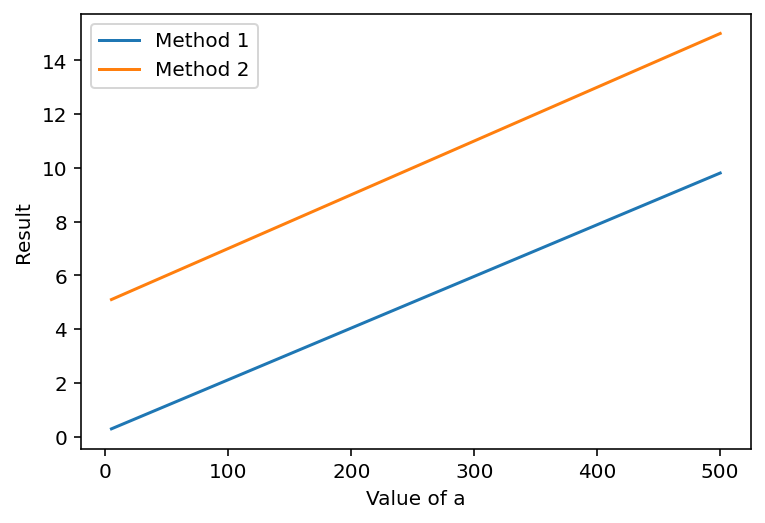

In [115]:
m1 = method1(a,b,c,d)
m2 = method2(a,b,c,d)

plt.plot(a, m1)
plt.plot(a, m2)
plt.legend(['Method 1', 'Method 2'])
plt.xlabel('Value of a')
plt.ylabel('Result')
plt.show()

In [96]:
550 / 12

45.833333333333336

In [93]:
a_upper = 100_000
a_step = a_upper / 100
a = np.arange(0, a_upper, a_step)
b = a / 100
c = np.array([3]*100)
d = np.array([3]*100)

In [94]:
def get_inputs(idx, a, b, c, d):
    print(f'a: {a[idx]}')
    print(f'b: {b[idx]}')
    print(f'c: {c[idx]}')
    print(f'd: {d[idx]}')

In [95]:
get_inputs(50, a, b, c, d)

a: 50000.0
b: 500.0
c: 3
d: 3


In [90]:
func2(1,1,1,1)

2.0

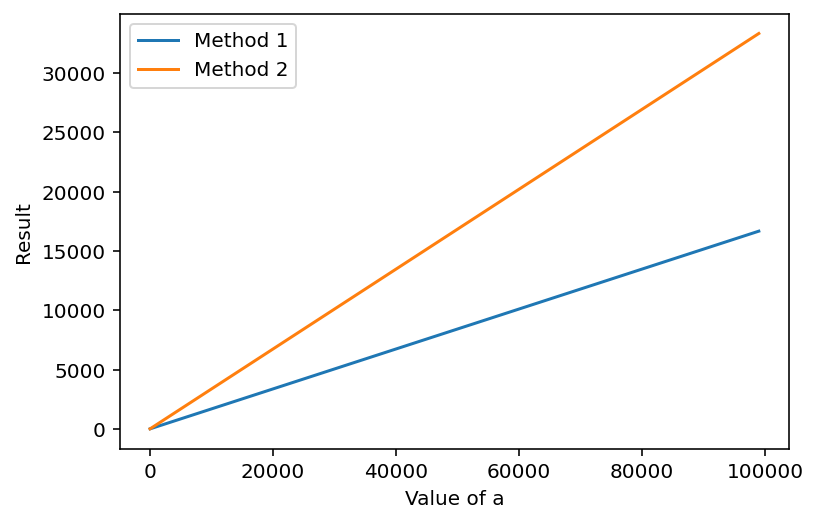

In [91]:
res1 = func1(a,b,c,d)
res2 = func2(a,b,c,d)

plt.plot(a, res1)
plt.plot(a, res2)
plt.legend(['Method 1', 'Method 2'])
plt.xlabel('Value of a')
plt.ylabel('Result')
plt.show()

In [92]:
50500 / 6

8416.666666666666

In [ ]:
(50000 / 3) + (500 / 3)

In [4]:
%matplotlib inline

In [14]:
# from mpl_toolkits import mplot3d


# def z_function(x, y):
#     return np.sin(np.sqrt(x ** 2 + y ** 2))

# x = np.linspace(-6, 6, 30)
# y = np.linspace(-6, 6, 30)

# X, Y = np.meshgrid(x, y)
# Z = z_function(X, Y)


# fig = plt.figure(figsize=(10, 10))
# ax = plt.axes(projection="3d")
# ax.plot_wireframe(X, Y, Z, color='green')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')

# plt.show()

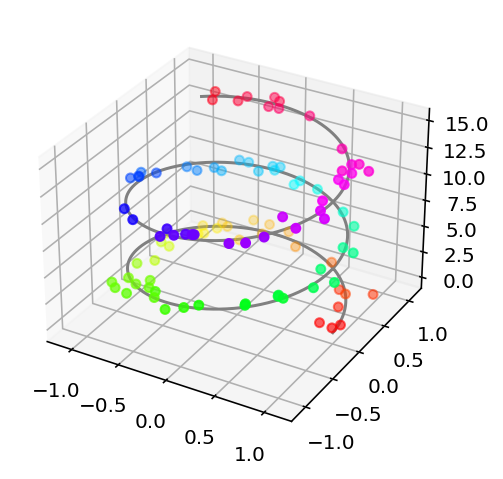

In [6]:
a_upper = 100_000
a_step = a_upper / 100
a = np.arange(0, a_upper, a_step)
b = a / 100

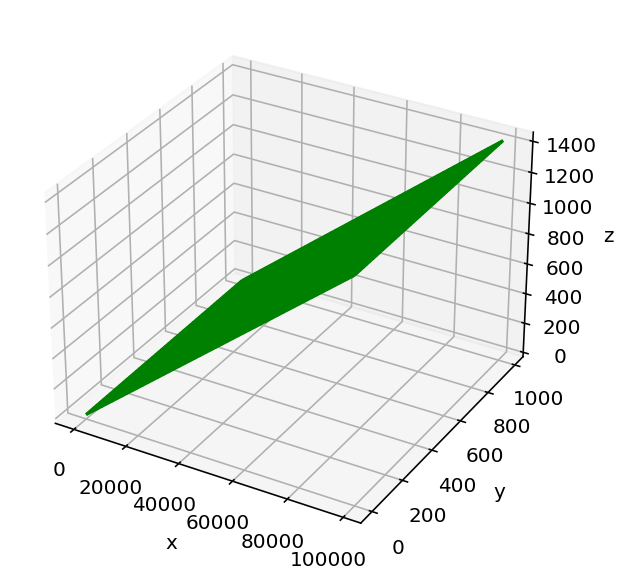

In [8]:
from mpl_toolkits import mplot3d


def method1(a, b):
    c = 50
    d = 20
    return (a + b) / (c + d) 

a_upper = 100_000
a_step = a_upper / 100
a = np.arange(0, a_upper, a_step)
b = a / 100

X, Y = np.meshgrid(a, b)
Z = method1(X, Y)


fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color='green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

<ipython-input-11-6a20514b8e44>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax2.pcolormesh(X, Y, Z, cmap="magma")


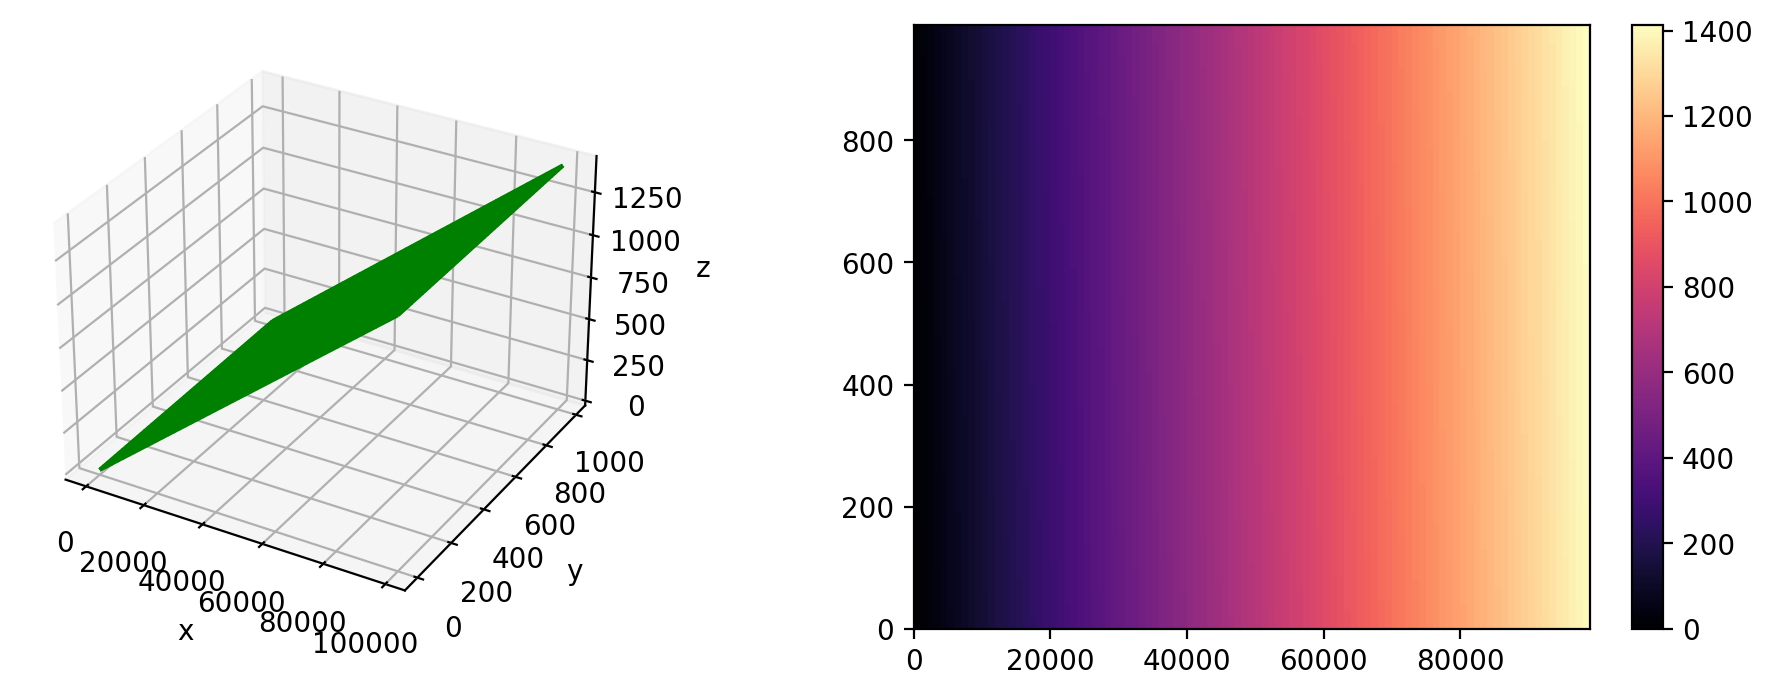

In [11]:
from mpl_toolkits import mplot3d


def method1(a, b):
    c = 50
    d = 20
    return (a + b) / (c + d) 

a_upper = 100_000
a_step = a_upper / 100
a = np.arange(0, a_upper, a_step)
b = a / 100

X, Y = np.meshgrid(a, b)
Z = method1(X, Y)


fig = plt.figure(figsize=(12, 4), dpi=100)       
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot_wireframe(X, Y, Z, color='green')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

c = ax2.pcolormesh(X, Y, Z, cmap="magma")
fig.colorbar(c, ax=ax2)

plt.show()

<ipython-input-12-0a0201d59c18>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax2.pcolormesh(X, Y, Z, cmap="magma")


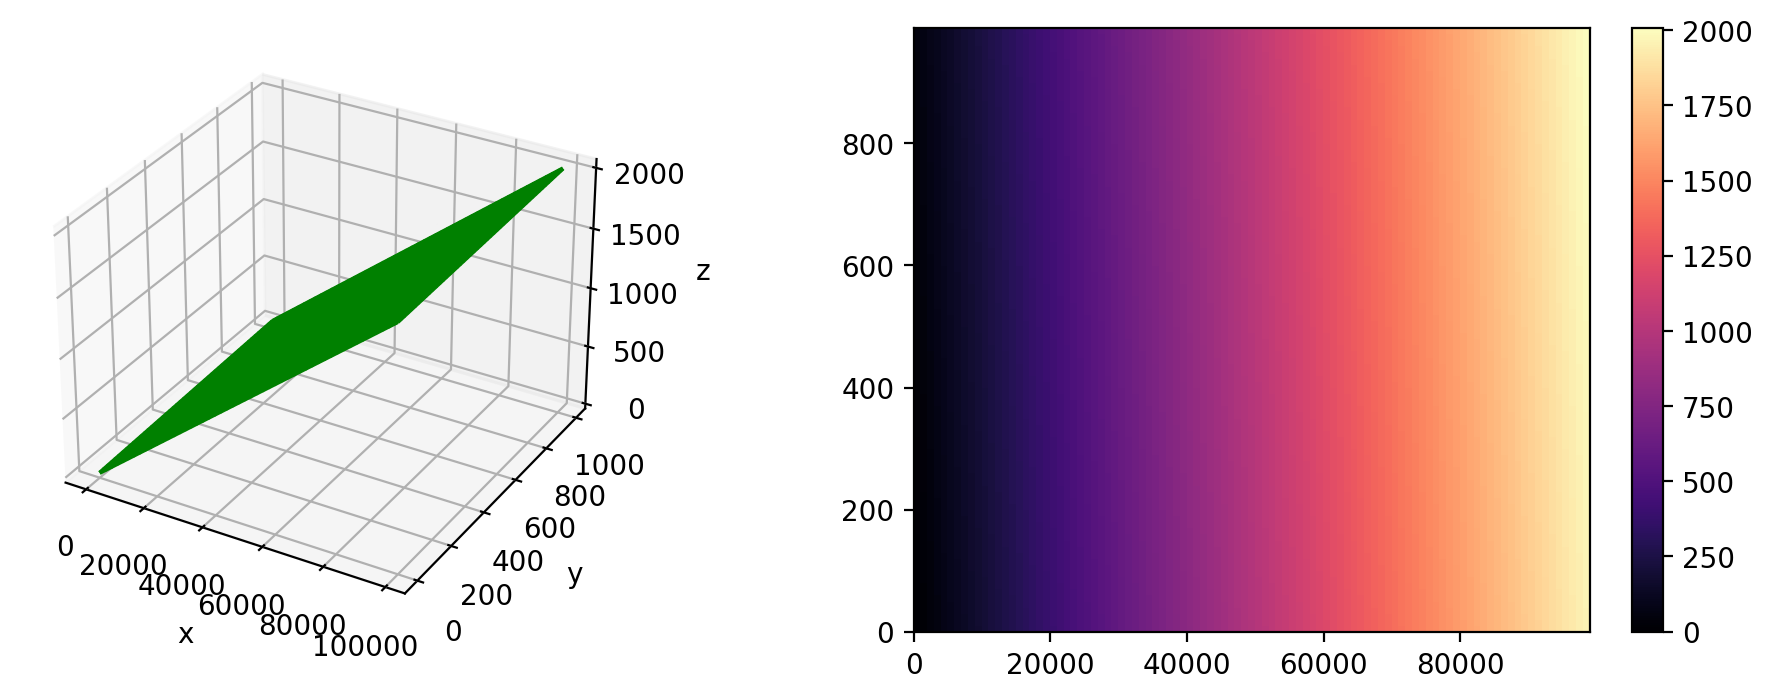

In [12]:
from mpl_toolkits import mplot3d


def method2(a, b):
    c = 50
    d = 20
    return (a/c) + (b/d) 

a_upper = 100_000
a_step = a_upper / 100
a = np.arange(0, a_upper, a_step)
b = a / 100

X, Y = np.meshgrid(a, b)
Z = method2(X, Y)


fig = plt.figure(figsize=(12, 4), dpi=100)       
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot_wireframe(X, Y, Z, color='green')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

c = ax2.pcolormesh(X, Y, Z, cmap="magma")
fig.colorbar(c, ax=ax2)

plt.show()

$$\frac{a}{b + c} \neq \frac{a}{b} + \frac{a}{c}$$

### Division vs. Multiplication

Let us note the definition of a [linear map](https://en.wikipedia.org/wiki/Linear_map):

> A linear function is a map $f$ between two vector spaces that preserves vector addition and scalar multiplication:
$$f(x + y) = f(x) + f(y)$$
$$f(ax) = af(x)$$

### Is multiplication linear? 
Let us now see if multiplication is linear. We can define $f$ to be :

$$f(x) = 100x$$

Now let $x = 4$ and $y = 6$. We see that:

$$f(x + y) = f(4 + 6) = f(10) = 100 \times 10 = 1000$$ 

$$f(x) + f(y) = 100 \times 4 + 100 \times 6 = 400 + 600 = 1000$$

So yes it is a linear map. 

Visually we can see it's linearity via:

In [4]:
START = 1 

def multiply(x, num=START):
    return num * x 

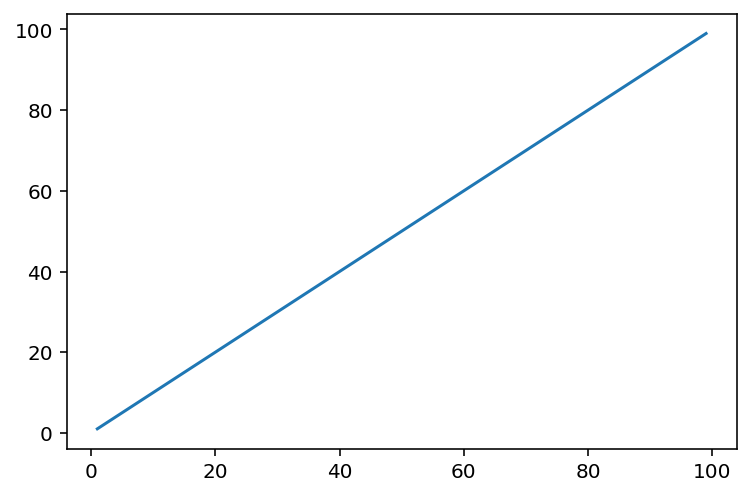

In [5]:
x = np.arange(1, 100, 1)
y = multiply(x)
plt.plot(x, y)
plt.show()

### Is division linear?
Let us now ask the same question of division-namely, is it linear? We can define $f$ to be:

$$f(x) = \frac{100}{x}$$

Now let $x = 4$ and $y = 6$. We see that:

$$f(x + y) = f(4 + 6) = f(10) = \frac{100}{10} = 10$$ 

$$f(x) + f(y) = \frac{100}{4} + \frac{100}{6} = 25 + 16.66 = 41.66$$

Hence, division does not satisfy the conditions of a linear map. 

### Is division convex?
If division is not linear, what type of function can we classify it is as? A good starting point would be to see if it is convex. 

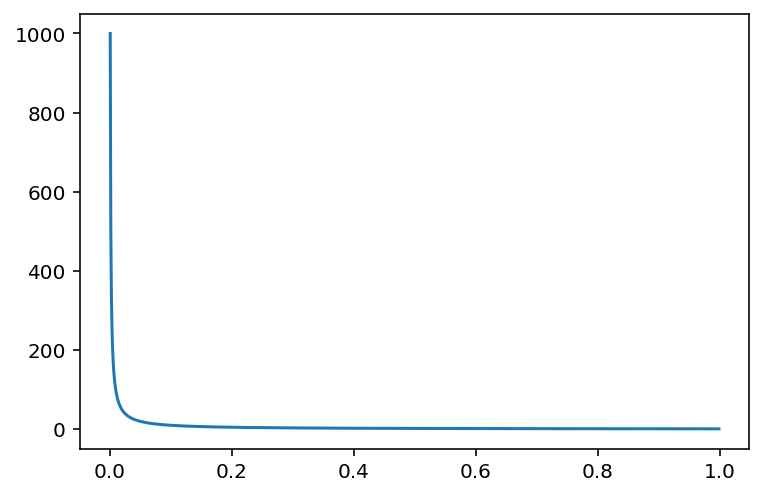

In [9]:
def divide(x, num=START):
    return num / x 


x = np.arange(0.001, 1, 0.001)
y = divide(x)
plt.plot(x, y)
plt.show()

Let us build up our understanding of convexity. Given two points $x_1$ and $x_2$, we can define their convex combination to be:

$$tx_1 + (1-t)x_2, \;\;\;\; \text{where} \; t \in [0,1]$$

Visually, in 1 dimension that would look like:

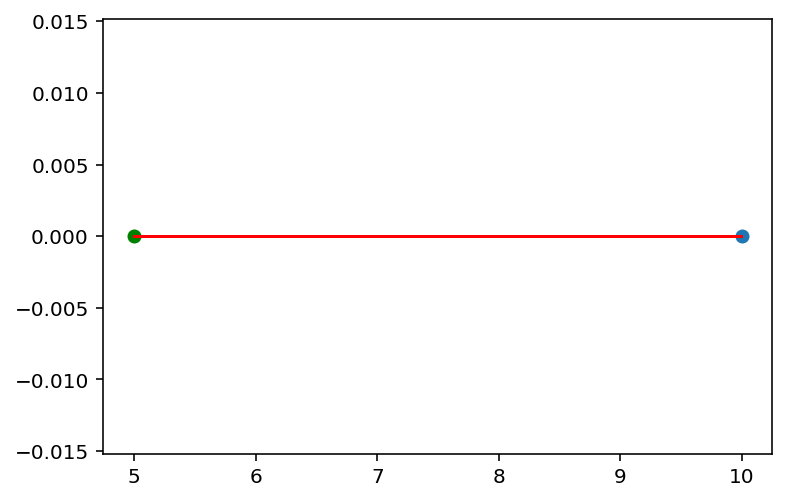

In [26]:
x1 = 5
x2 = 10

def convex_combination_d1(x1, x2):
    t = np.arange(0, 1, 0.001)
    return t*x1 + (1 - t)*x2

conv_comb = convex_combination_d1(x2, x1)
plt.scatter(x1, 0, c='g')
plt.scatter(x2, 0)
plt.plot(conv_comb, np.zeros(1000), c='r')
plt.show()

And in 2 dimensions:

In [32]:
p1 = (5,5)
p2 = (8,10)

def convex_combination_d2(p1, p2):
    t = np.arange(0, 1, 0.001)
    x1, y1 = p1[0], p1[1]
    x2, y2 = p2[0], p2[1]
    return t*x1 + (1 - t)*x2, t*y1 + (1 - t)*y2

In [34]:
conv_comb_x, conv_comb_y = convex_combination_d2(p1, p2)

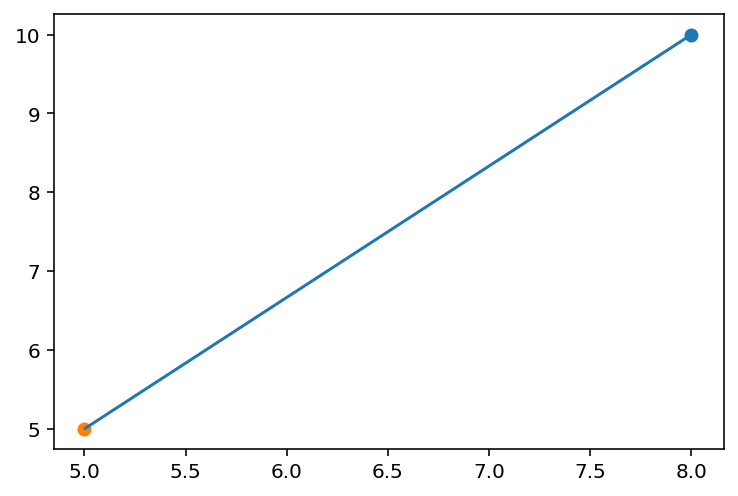

In [35]:
plt.scatter(p2[0], p2[1])
plt.scatter(p1[0], p1[1])
plt.plot(conv_comb_x, conv_comb_y)

### Convex Set
We then need to a define a **[convex set](https://en.wikipedia.org/wiki/Convex_set)**: 

> A set $S$ is convex if, for all $x$ and $y$ in $S$, the line segment connecting $x$ and $y$ is included in $C$. 

Visually we see that the following is a convex set:

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6b/Convex_polygon_illustration1.svg" width="300">

While the following is not:

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6c/Convex_polygon_illustration2.svg" width="300">

Another way of thinking about convex sets is that for a set $S$ to be convex, it must include all convex combinations that can be created based on points contained within it. We can see in the second image above that the set $S$ (shaded green) is _not_ convex because it does not include the convex combinations of the points $x$ and $y$ that can. be created and are shown be the red line segment. 

### Convex Function
We can now dig into the definition of a convex function. First, let us define it in direct relation to a convex set. 

A function is **convex** if and only if it's **[epigraph](https://en.wikipedia.org/wiki/Epigraph_(mathematics))** (the region above it's graph) is a convex set. We can see this below. The function (black curve, $f(x)$) is convex since it's epigraph (shaded green region) is a convex set:

<img src="https://upload.wikimedia.org/wikipedia/commons/3/31/Epigraph_convex.svg" width="500">

An equivalent definition (that is more widely presented) is that a real valued function is convex if the line segment between any two points on the graph of the function lies above the graph between the two points. 

More technically we can write this as:

> A function $f$ is called **convex** if:
$$\forall x_1, x_2 \in X, \; \forall t \in [0,1]: \;\;\;\; 
f\big(tx_1 + (1-t)x_2 \big) \leq tf(x_1) + (1-t)f(x_2)$$

If we break down this function we say that the RHS is a **linear combination** subjected to the constrain that $t + 1 - t = 1$, making it a **convex combination**:

$$f\big(tx_1 + (1-t)x_2 \big) \leq \overbrace{tf(x_1) + (1-t)f(x_2)}^\text{convex combination}$$

In [ ]:
import matplot

In [2]:
START = 1 

def add(x, num=START):
    return num + x 


def subtract(x, num=START):
    return num - x 


def multiply(x, num=START):
    return num * x 


def divide(x, num=START):
    return num / x 


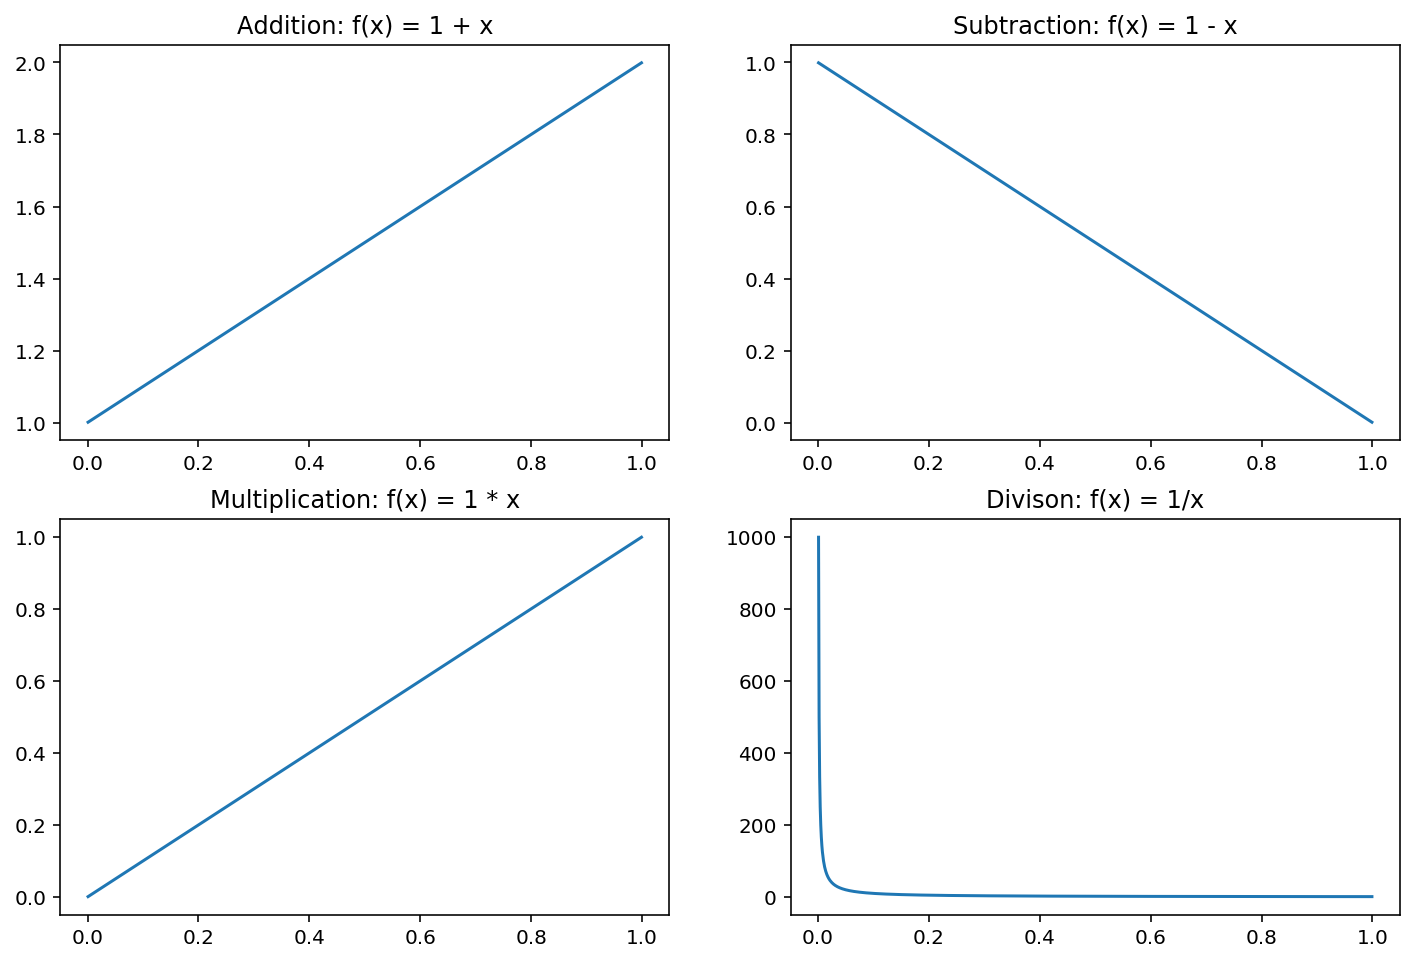

In [3]:
fig = plt.figure(figsize=(12, 8))




x = np.arange(0.001, 1, 0.001)



plt.subplot(2, 2, 1)
plt.plot(x, add(x))
plt.title('Addition: f(x) = 1 + x')

plt.subplot(2, 2, 2)
plt.plot(x, subtract(x))
plt.title('Subtraction: f(x) = 1 - x')

plt.subplot(2, 2, 3)
plt.plot(x, multiply(x))
plt.title('Multiplication: f(x) = 1 * x')

plt.subplot(2, 2, 4)
plt.plot(x, divide(x))
plt.title('Divison: f(x) = 1/x')

plt.show()

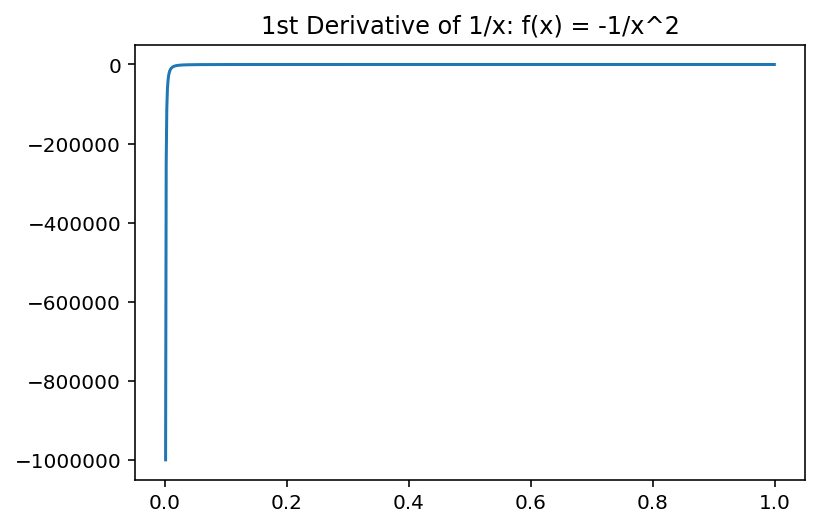

In [19]:
def derivative_division(x):
    return -1 / x**2


plt.plot(x, derivative_division(x))
plt.title('1st Derivative of 1/x: f(x) = -1/x^2')
plt.show()

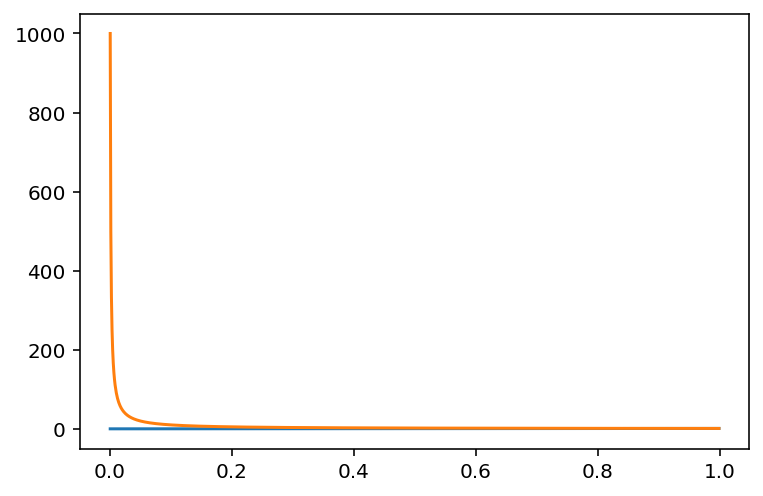

In [4]:
plt.plot(x, multiply(x))
# plt.title('Multiplication: f(x) = 1 * x')


plt.plot(x, divide(x))
# plt.title('Divison: f(x) = 1/x')
plt.show()

The key reason that division is not a linear operation (besides the visual intuition that we have provided), is as follows:
* A Linear function is one that satifies the following properties:
$$f(x+y) = f(x) + f(y)$$
$$f(ax) = af(x)$$
* So, consider the example of:
$$f(x) = -x$$
* It is linear? Yes! Now, outside of the fact that the graph of the function is a line, we can show this algebraically. We see that we can find a number $a$, such that for all $x$, $f(ax)$ is equal to $a \times x$:
$$f(-1x) = -1 \times f(x) = -1 \times (-x) = x$$

We are not able to say the same thing in terms of division. Let:

$$f(x) = \frac{1}{x}$$

For this to be linear we know that the following must hold:

$$f(ax) = a f(x)$$
$$\frac{1}{ax} = \frac{a}{x}$$


$$\frac{1}{x} = a \times x$$

Can we find a number $a$, such that $\forall x$, the above equality holds? No! Performing some basic algebra allows us to see that:

$$a = \frac{1}{x^2}$$

And then we see that if we now vary $x$, $a$ has to of course change:
$$x = 1 \longrightarrow a = \frac{1}{1}$$
$$x = 2 \longrightarrow a = \frac{1}{4}$$
$$x = 3 \longrightarrow a = \frac{1}{9}$$

Hence, there is simply no way for division to satisfy the conditions necessary to be a linear map. 

## Averages
Now, let us take this new way of reasoning and see how it affects a traditional *average*:

$$\bar{X} = \frac{1}{n} \sum_{i=1}^n x_i = \frac{x_1+ \dots + x_n}{n}$$

If we think about this functionally, we can see that a traditional average is (in part) a function of $n$:

$$f(n) = \frac{1}{n} \sum_{i=1}^n x_i = \frac{x_1+ \dots + x_n}{n}$$

Now, let us look the response of the average as we increase the number of samples:

In [29]:
def f_av(n, x=30):
    num = np.array([x for i in range(0, n)]).sum()
    return num / n

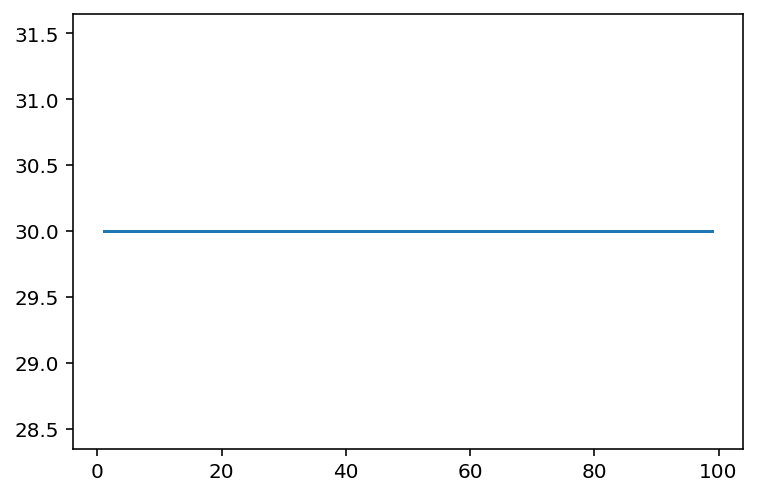

In [38]:
n = np.arange(1, 100, 1)
f_av_of_n = np.array([f_av(n_i) for n_i in n])
plt.plot(n, f_av_of_n)
plt.show()

So, we see above that our resulting output remains constant at $30$. This intuitively makes sense, seeing as if we are taking the average of $n$ samples, and they all have the exact same value, we would expect their average to simply be that value. But, let's look at the mechanics of what is happening here.

Notice that as we increase $n$ by a single unit (i.e. increase $n$ by $1$), our denominator increases by $1$ while our numerator increases by a full $x$ (in this case by $30$). Let's make this a bit more concrete:

$$\overbrace{\frac{30 + 30 + 30 + 30}{4}}^\text{n=4} \longrightarrow 
\overbrace{\frac{30 + 30 + 30 + 30+30}{5}}^\text{n=5} 
$$

$$\frac{\Delta \text{numerator}}{\Delta \text{denominator}} = \frac{30}{1}$$

Let me reiterate what we are doing here:
* We are increasing $n$ by a single unit
* We are looking at the resulting change in the numerator (30)
* We are looking at the resulting change in the denominator (1)

Now, the only thing left at this point is too see how the operation of division effects these two changes. Put another way:
> After we increase number (the numerator) by 30, and we increase another number (the denominator) by 1, if we *divide* the former by the latter, what is the result? Clearly it is just 1. 

We see that in this case we can really write our function as $\frac{n\times30}{n} = 30$. In other words, dividing by $n$ directly cancels multiplying by $n$ in the numerator. 

In [44]:
x1 = np.array([10,9,8])


res = f(x)
pd.DataFrame({'x': x, 'f(x)': res})

,x,f(x)
0,1,31
1,2,32
2,3,33
3,4,34
4,5,35


Now, let us perform the inverse operation (subtraction), but going in the other direction:

In [45]:
def f2(y):
    return 30 - y

y = np.array([5,4,3,2,1])
res2 = f2(y)

In [46]:
res2

array([25, 26, 27, 28, 29])

In [64]:
%matplotlib notebook

<IPython.core.display.Javascript object>


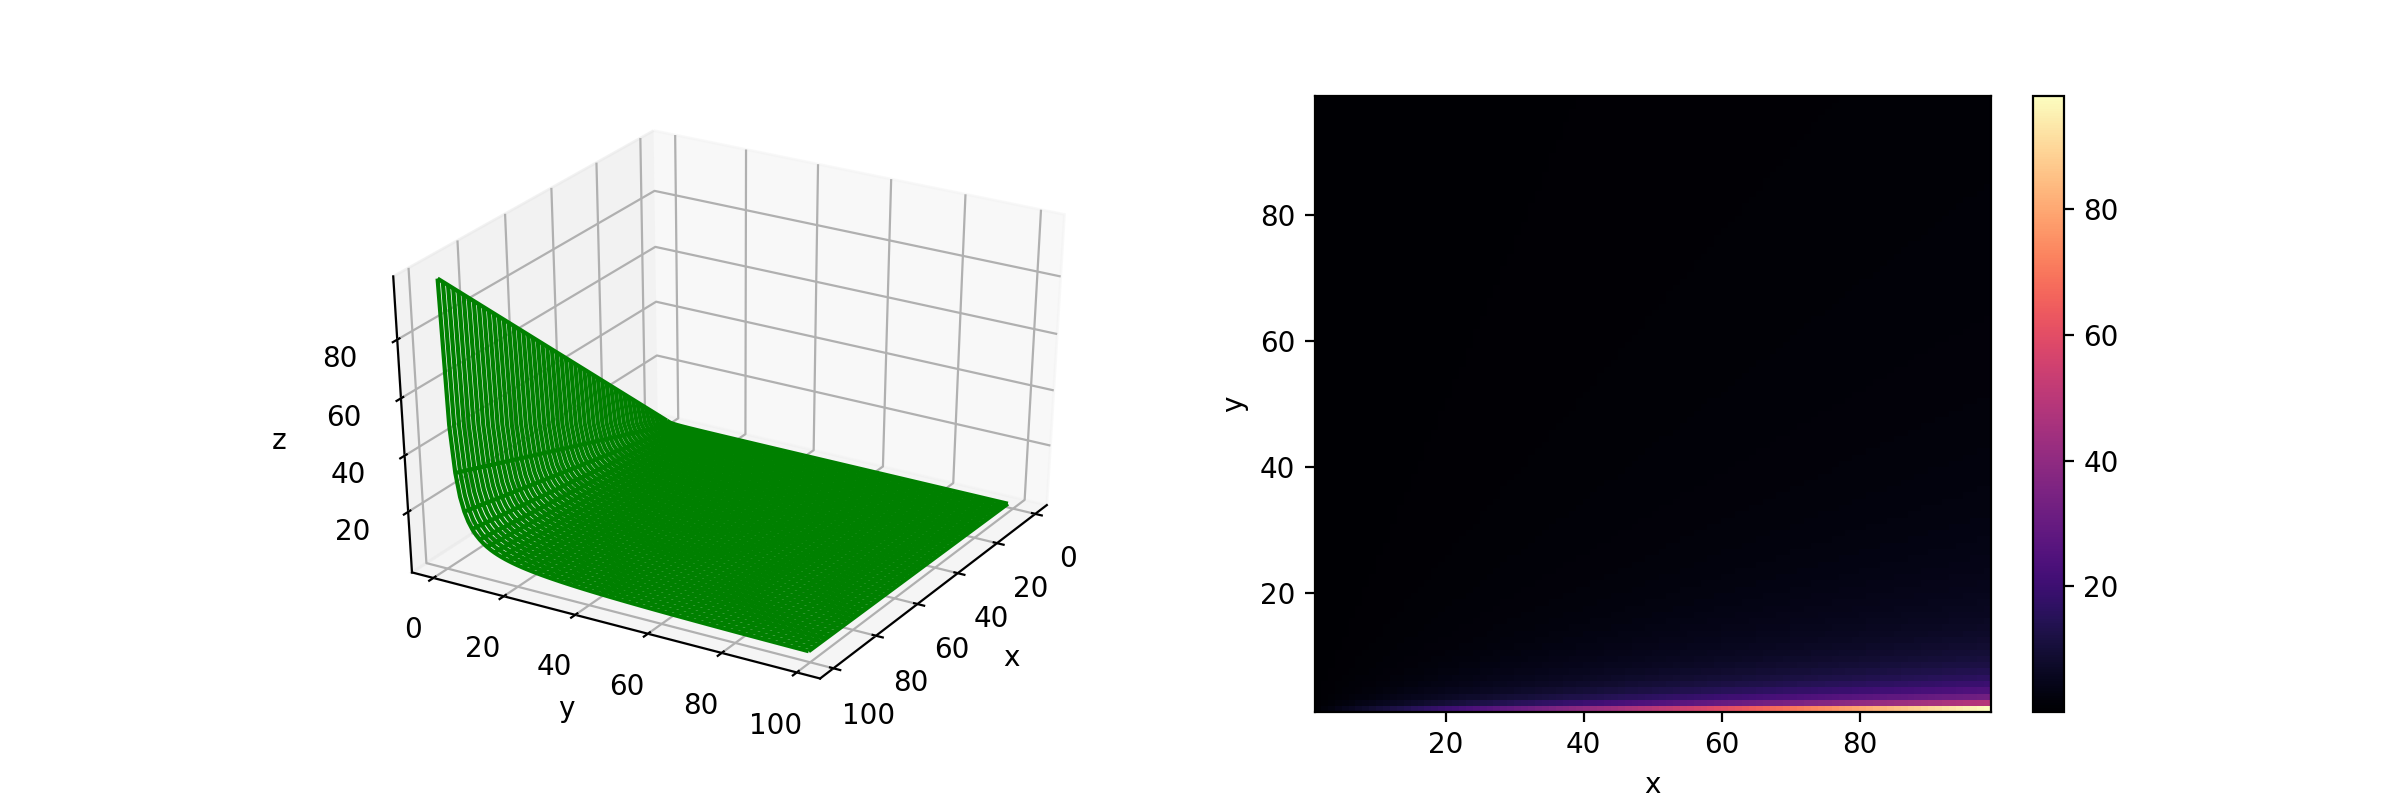

In [65]:
from mpl_toolkits import mplot3d


def mult_div(x, y):
    return x / y

x = np.arange(1, 100, 1)
y = np.arange(1, 100, 1)

X, Y = np.meshgrid(x, y)
Z = mult_div(X, Y)


fig = plt.figure(figsize=(12, 4), dpi=100)       
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot_wireframe(X, Y, Z, color='green')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

c = ax2.pcolormesh(X, Y, Z, cmap="magma")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
fig.colorbar(c, ax=ax2)

plt.show()

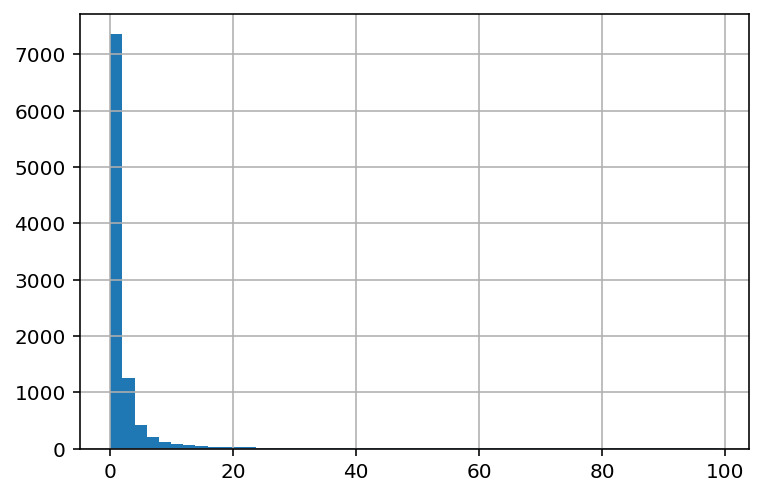

In [63]:
pd.Series(Z.flatten()).hist(bins=50)

<IPython.core.display.Javascript object>


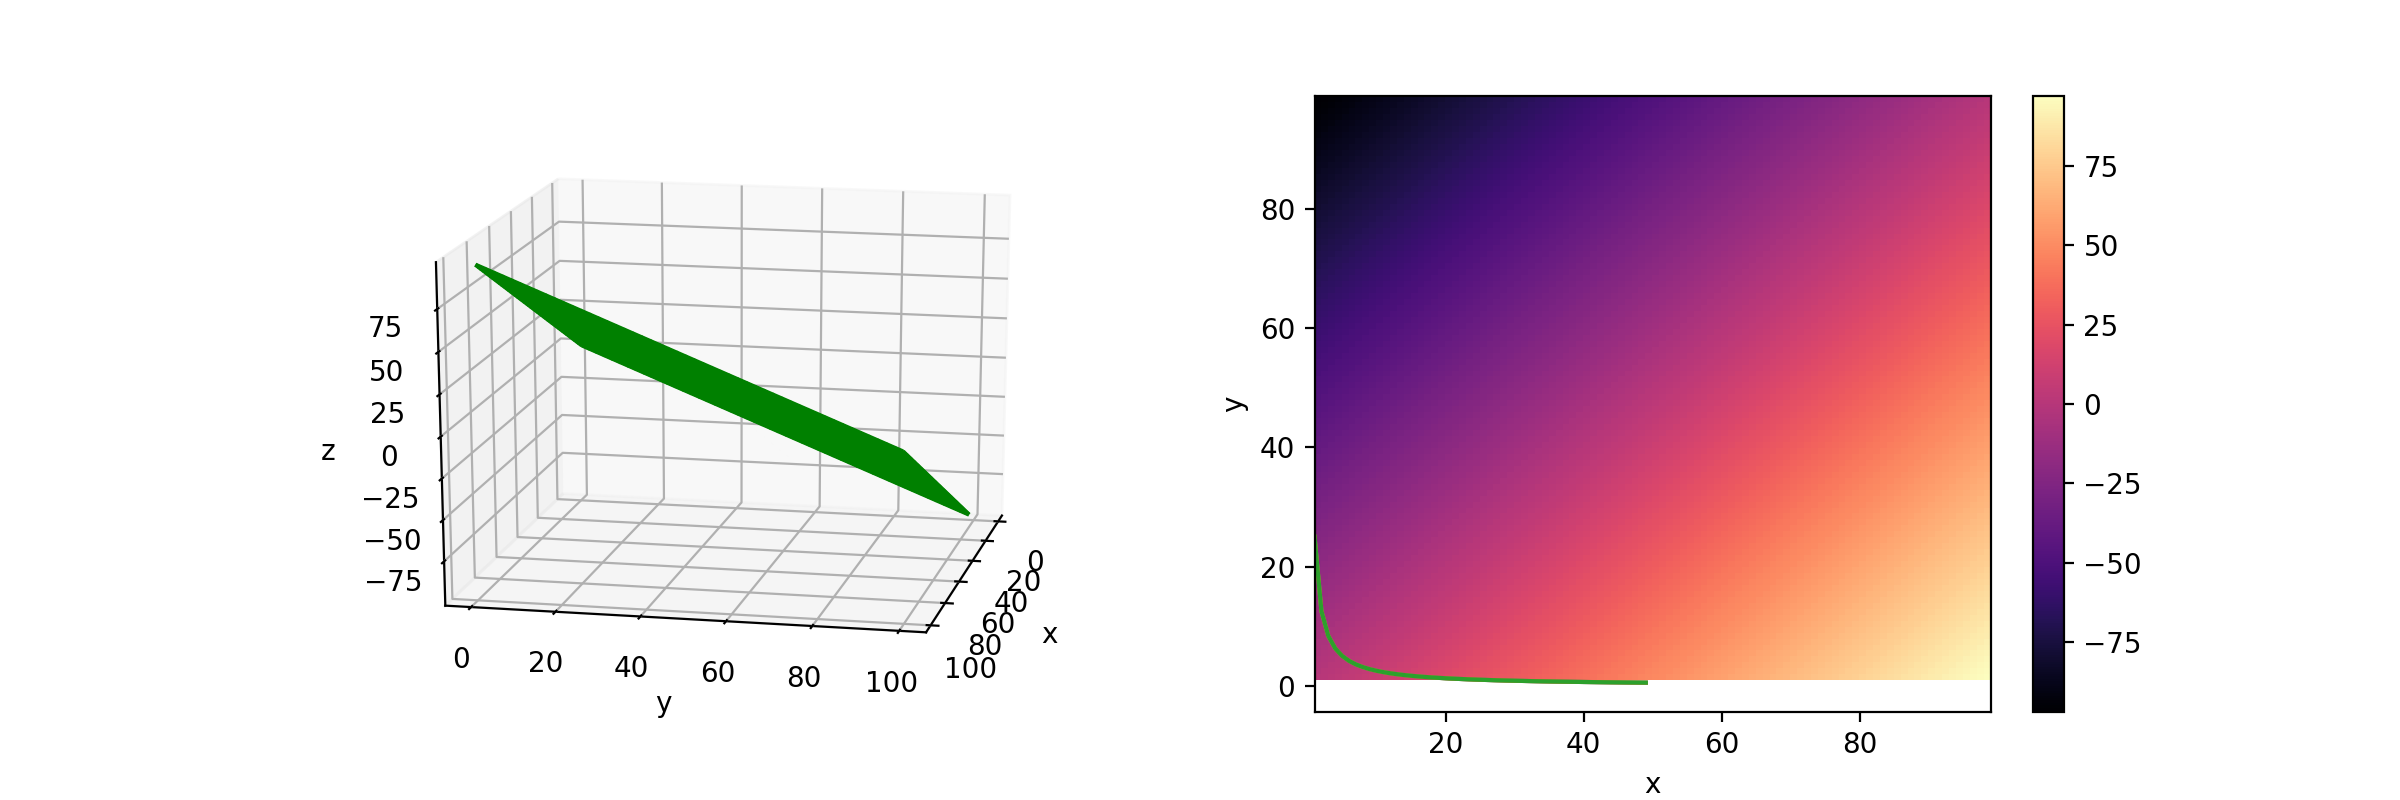

In [67]:
from mpl_toolkits import mplot3d


def add_sub(x, y):
    return x - y

x = np.arange(1, 100, 1)
y = np.arange(1, 100, 1)

X, Y = np.meshgrid(x, y)
Z = add_sub(X, Y)


fig = plt.figure(figsize=(12, 4), dpi=100)       
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot_wireframe(X, Y, Z, color='green')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

c = ax2.pcolormesh(X, Y, Z, cmap="magma")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
fig.colorbar(c, ax=ax2)

plt.show()

In [68]:
20 / 25

0.8

In [80]:
num = 25
den = np.arange(1, 50, 1)
res = num / den
deriv_res = num * (-1 / den**2)
deriv_num = (np.zeros(len(den)) + 1 ) * num

In [75]:
%matplotlib inline

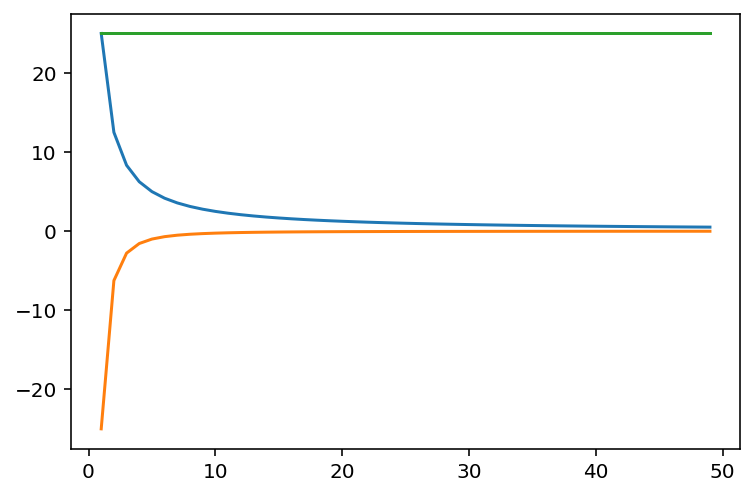

In [81]:
plt.plot(den, res)
plt.plot(den, deriv_res)
plt.plot(den, deriv_num)
plt.show()

In [82]:
c = 50

In [87]:
res1 = (c * 30) / 20
res2 = (c * 30) / 21
print(res1, res2)
print('Delta: ', res2 - res1)

75.0 71.42857142857143
Delta:  -3.5714285714285694


In [93]:
res1 = (c * 30) / 20
res2 = (c * 31) / 20
print(res1, res2)
print('Delta: ', res2 - res1)

75.0 77.5
Delta:  2.5


Above is KEY! It shows, very simply, that in the same situation, a 1 unit increase in the divisor has a more powerful reduction effect than a 1 unit increase in the multiplier (a -3.5 unit decrease compared to a 2.5 unit increase). Below, we see fully that a 1 unit increase in the divisor and a 1 unit increase in the numerator lead to a *smaller* resulting number! This is because division (in this case) is more powerful than multiplication!

In [94]:
res1 = (c * 30) / 20
res3 = (c * 31) / 21
print(res1, res3)

75.0 73.80952380952381


This really comes down to the fact that the derivatives of these two operations are very different. Let our function be:

$$f(x_1, x2) = \frac{c\cdot x_1}{x_2}$$

$$\frac{d}{dx_1} \big( \frac{c\cdot x_1}{x_2} \big) = \frac{c}{x_2} $$

$$\frac{d}{dx_2} \big( \frac{c\cdot x_1}{x_2} \big) = \frac{-c \cdot x_1}{x_2^2} $$

So, in the case where $c = 50$, $x_1 = 30$ and $x_2 = 20$, our derivatives evaluate to:

$$\frac{c}{x_2} = \frac{50}{20} = 2.5$$

$$\frac{-c \cdot x_1}{x_2^2} = \frac{-50 \cdot 30}{20^2} = - 3.75$$

When we combine the effects of these two conflicting operations, we get:

$$2.5 - 3.75 = -1.25$$

Which is approximately the resulting effect of a 1 unit increase in both our numerator and denominator at this specific location. The 1 unit increase due to division was more powerful than the 1 unit increase due to multiplicaiton.

Remember, the reason this feels counter intuitive is because when our values for $x_1$ and $x_2$ are the same, they are perfect inverses; that is the location where their effect size is equally powerful, hence applying one followed by the other results in a perfect cancellation. 

However, this is not the case at other locations!!! To further illustrate this, let's look at the other side of the coin. Consider now a situation where out numerator is smaller than our denominator. A 1 unit increase in each will now result in a final number larger than the original!

In [97]:
res1 = (c * 20) / 30
res3 = (c * 21) / 31
print(res1, res3)

33.333333333333336 33.87096774193548


We may ask why at this point. The reason is that division is a convex operation. There is a point when it's decrease slope over powers the constant slope of multiplication. However, due it's convex nature, divsion will eventually taper off, while the multiplicative power remains constant. 

What it really comes down to is that multiplication is more powerful when the numerator is greater than the denominator. Division is more powerful when the denominator is greater than the numerator.

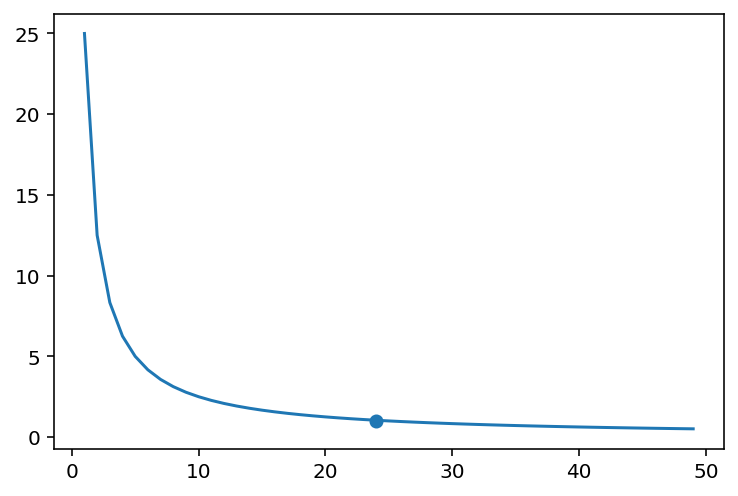

In [108]:
plt.plot(den, res)
idx = np.where(res==1)[0][0]
plt.scatter(idx, 1)
plt.show()

In [114]:
(-50 * 30) / (24.5**2)

-2.4989587671803415

In [116]:
-1 / (0.5**2)

-4.0

In [117]:
1/ 9 

0.1111111111111111

In [119]:
def mult_div(num, den):
    return num / den

In [122]:
num_fixed = 20
den_fixed = 20
num = np.arange(1,100,1)
den = np.arange(1,100,1)

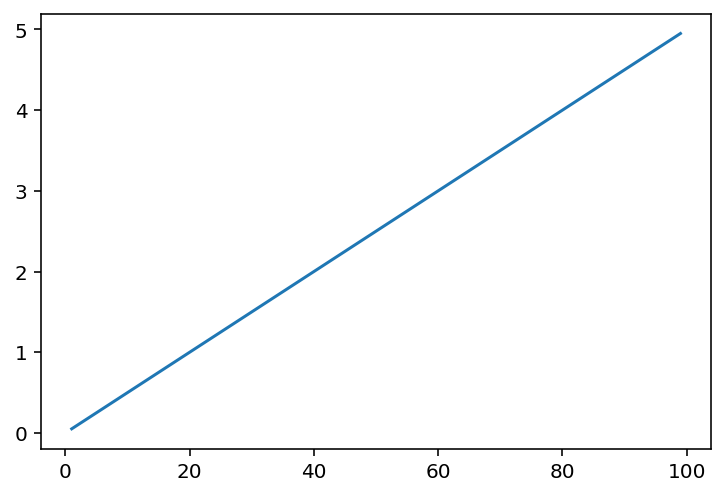

In [124]:


plt.plot(num, mult_div(num, den_fixed))

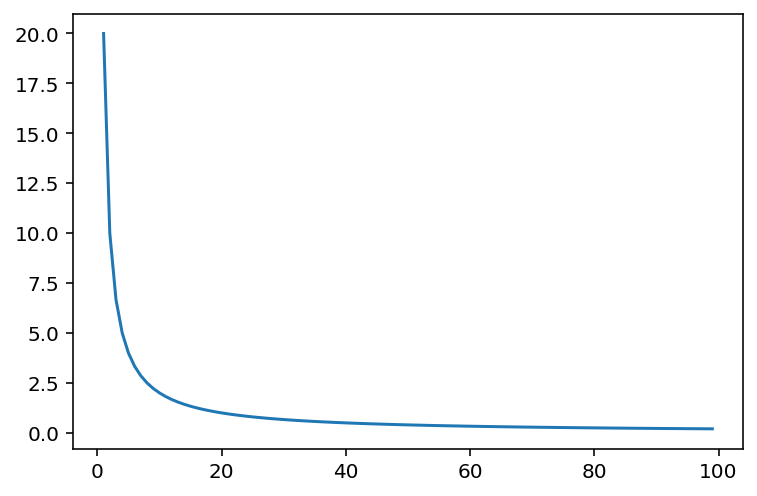

In [125]:
plt.plot(den, mult_div(num_fixed, den))

In [126]:
5/5

1.0

### Numerator larger than denominator

In [127]:
print(5/3)
print(6/4)

1.6666666666666667
1.5


In [130]:
print(5.001/5.000)
print(5.002/5.001)
print(5.003/5.002)

1.0002
1.0001999600079983
1.0001999200319873


In [128]:
print(3/5)
print(4/6)

0.6
0.6666666666666666


In [132]:
20.1 / 10.1

1.9900990099009903

### Delta grows, but ratio shrinks 

In [139]:
num = 5
den = 3
print(f'Delta: {num - den}')
print(f'f(x,y): {num / den}')
num = 6
den = 4
print(f'Delta: {num - den}')
print(f'f(x,y): {num / den}')
print('\n')

num = 10_000
den = 9_995
print(f'Delta: {num - den}')
print(f'f(x,y): {num / den}')
num = 10_001
den = 9_996
print(f'Delta: {num - den}')
print(f'f(x,y): {num / den}')


Delta: 2
f(x,y): 1.6666666666666667
Delta: 2
f(x,y): 1.5


Delta: 5
f(x,y): 1.0005002501250626
Delta: 5
f(x,y): 1.000500200080032


In [140]:
x = np.arange(0, 5, 0.001)
y = 5

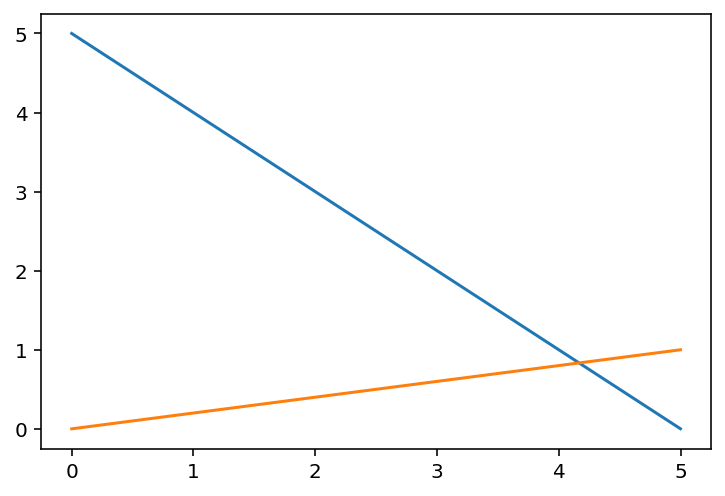

In [142]:
plt.plot(x, y - x)
plt.plot(x, x / y)

### Partial Derivative Exploration
If we start with the function: 

$$f(x,y) = \frac{x}{y}$$

We can then see it's partial derivative with respect to $x$:

$$\frac{\partial f(x,y)}{\partial x} = \frac{1}{y}$$

And $y$:

$$\frac{\partial f(x,y)}{\partial y} = \frac{-x}{y^2}$$

We can then plot both to get a visual idea of how they response across the domain of $x$ and $y$:

In [143]:
def partial_wrt_x(x,y):
    return 1 / y

def partial_wrt_y(x,y):
    return -x / y**2

In [162]:
%matplotlib inline

<IPython.core.display.Javascript object>


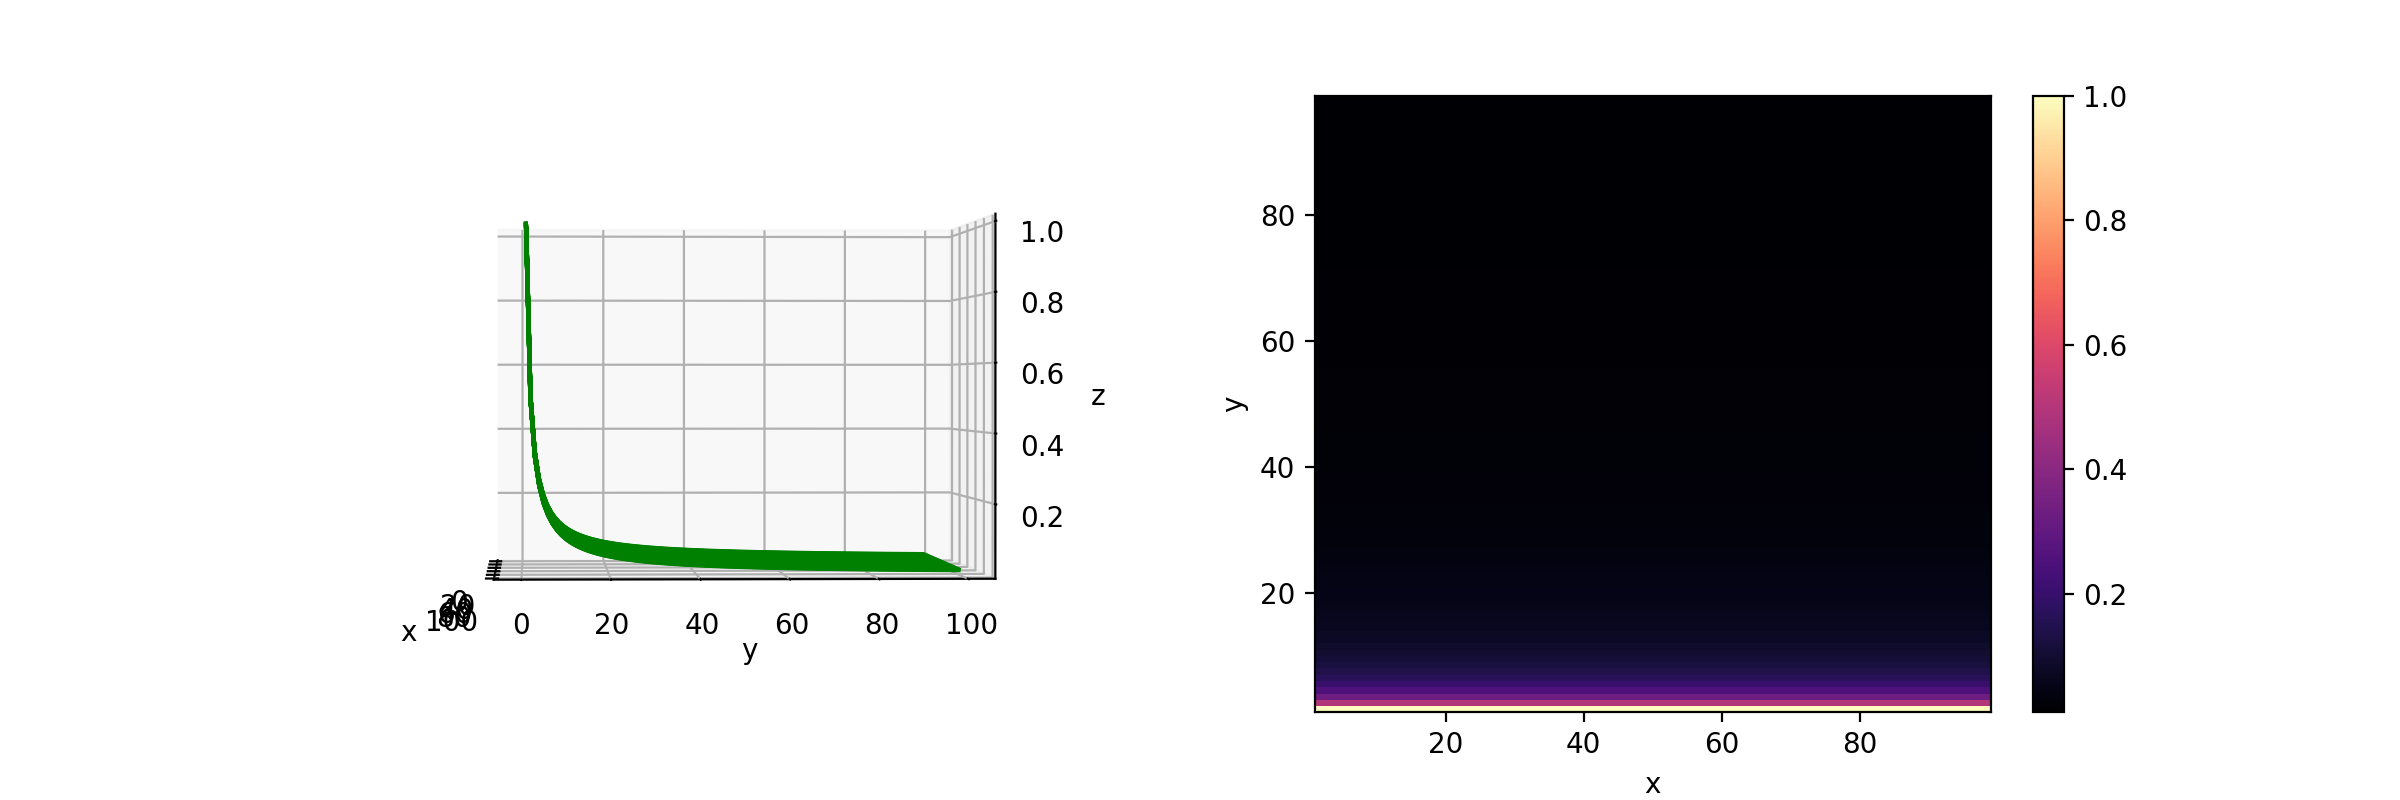

In [146]:
from mpl_toolkits import mplot3d


x = np.arange(1, 100, 1)
y = np.arange(1, 100, 1)

X, Y = np.meshgrid(x, y)
Z = partial_wrt_x(X, Y)


fig = plt.figure(figsize=(12, 4), dpi=100)       
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot_wireframe(X, Y, Z, color='green')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

c = ax2.pcolormesh(X, Y, Z, cmap="magma")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
fig.colorbar(c, ax=ax2)

plt.show()

<IPython.core.display.Javascript object>


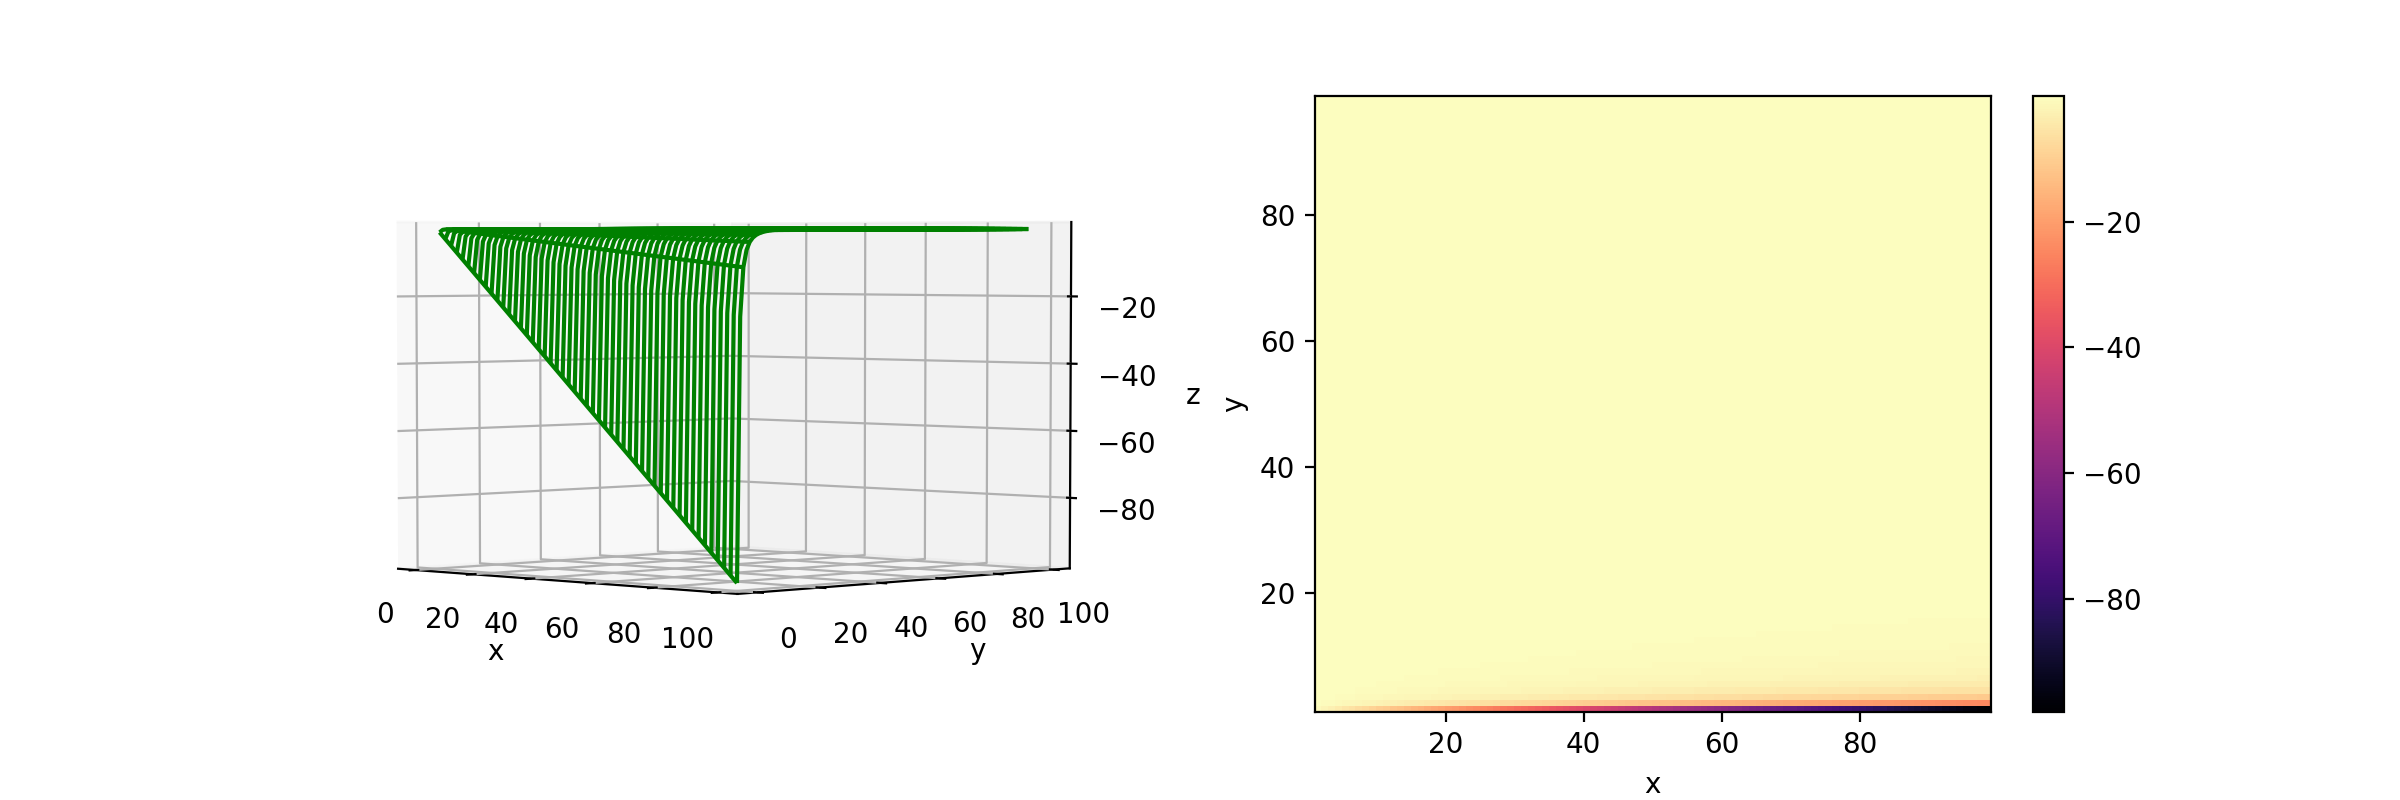

In [147]:
from mpl_toolkits import mplot3d


x = np.arange(1, 100, 1)
y = np.arange(1, 100, 1)

X, Y = np.meshgrid(x, y)
Z = partial_wrt_y(X, Y)


fig = plt.figure(figsize=(12, 4), dpi=100)       
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot_wireframe(X, Y, Z, color='green')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

c = ax2.pcolormesh(X, Y, Z, cmap="magma")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
fig.colorbar(c, ax=ax2)

plt.show()

However, visually these are still somewhat challenging to reason about. We can break the problem down a bit further by seeing the total derivative:

<IPython.core.display.Javascript object>


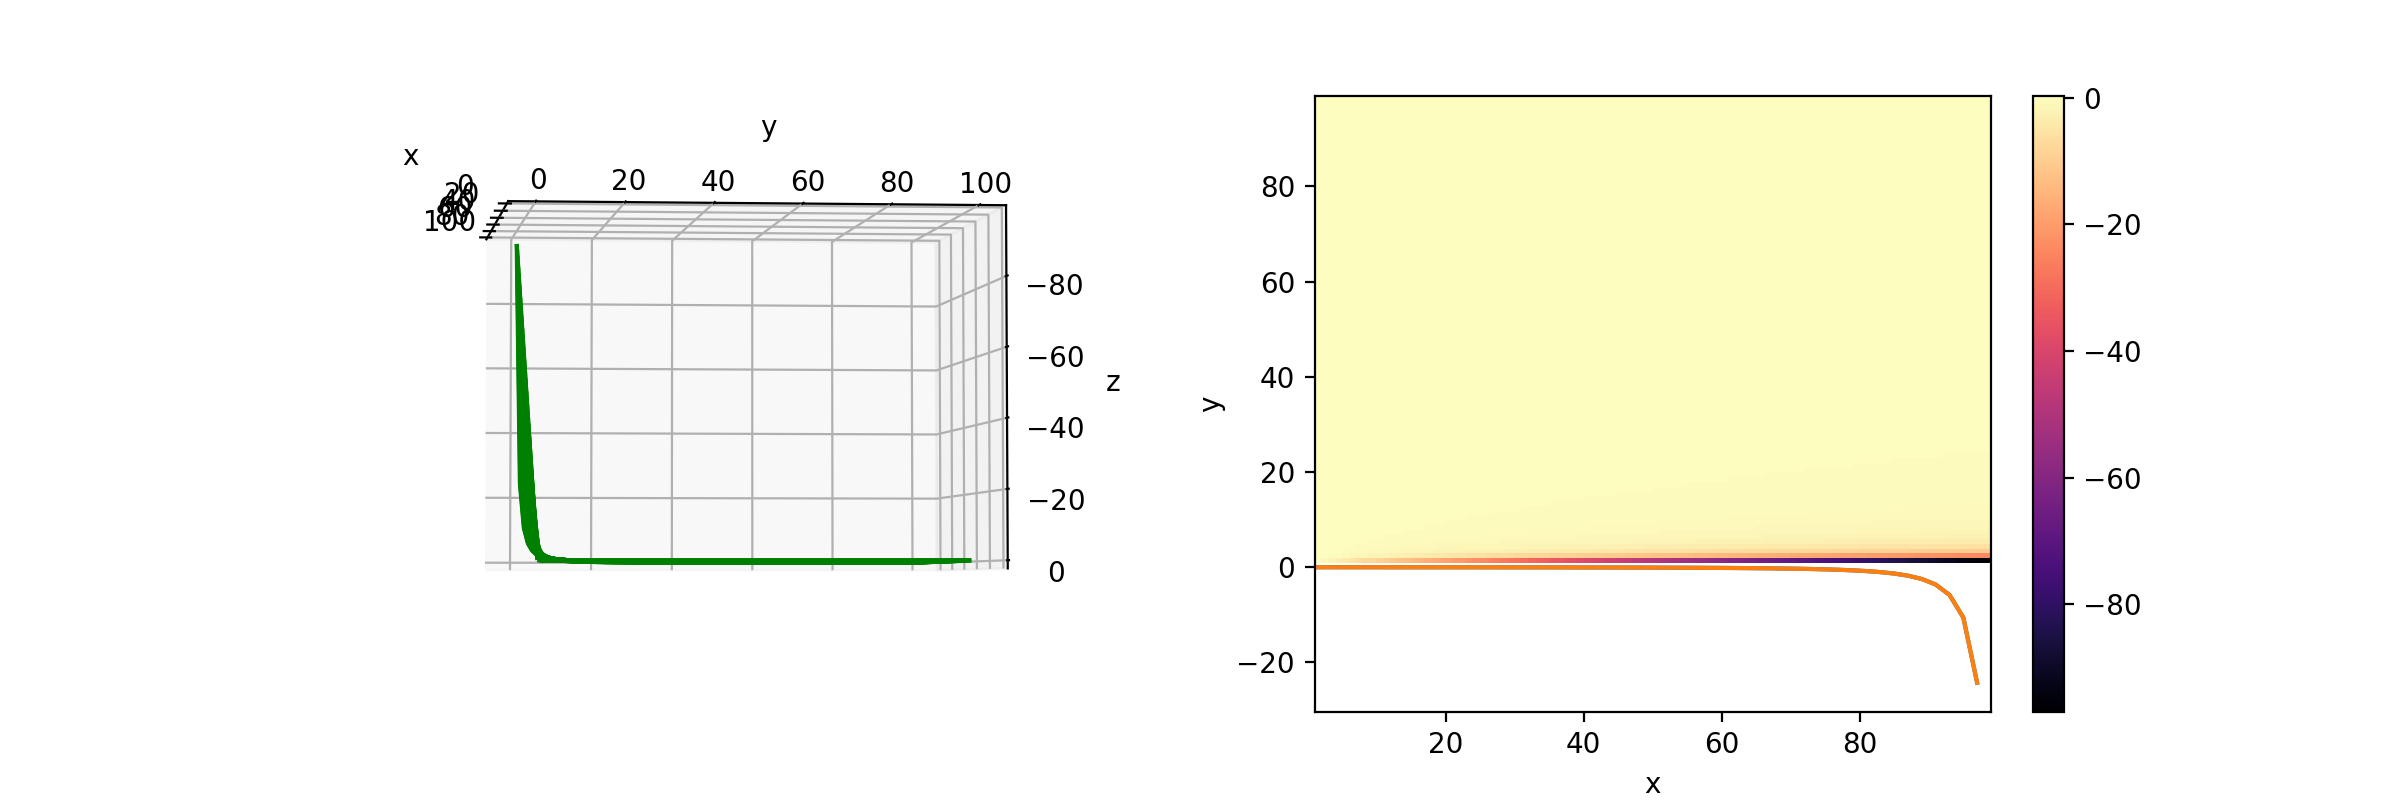

In [148]:
from mpl_toolkits import mplot3d


x = np.arange(1, 100, 1)
y = np.arange(1, 100, 1)

X, Y = np.meshgrid(x, y)
Z = partial_wrt_x(X, Y) + partial_wrt_y(X, Y)


fig = plt.figure(figsize=(12, 4), dpi=100)       
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot_wireframe(X, Y, Z, color='green')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

c = ax2.pcolormesh(X, Y, Z, cmap="magma")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
fig.colorbar(c, ax=ax2)

plt.show()

In [152]:
print(partial_wrt_x(10, 20))
print(partial_wrt_y(10, 20))

0.05
-0.025


In [153]:
print(partial_wrt_x(20, 10))
print(partial_wrt_y(20, 10))

0.1
-0.2


### How does the delta between our partials change and the delta between $x$ and $y$ grows?

#### When $x > y$

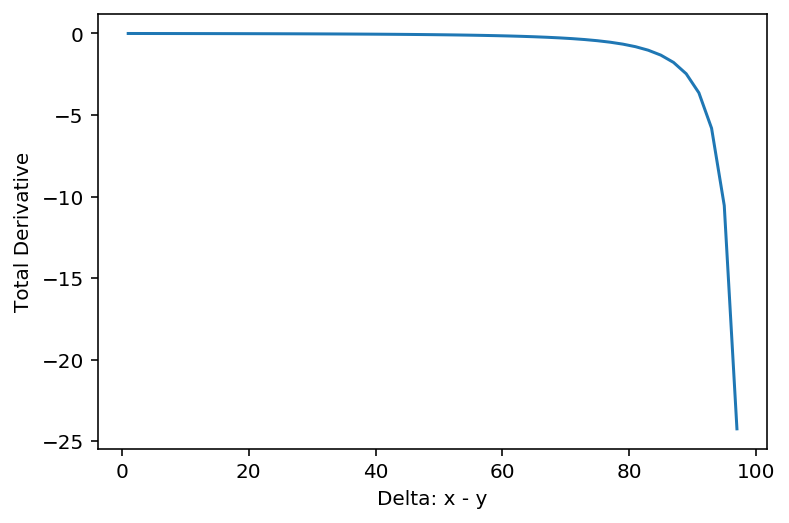

In [177]:
x = np.arange(51, 100, 1)
y = np.arange(50, 1, -1)
delta = x - y
total_derivative = partial_wrt_x(x, y) + partial_wrt_y(x, y)

plt.plot(delta, total_derivative)
plt.xlabel('Delta: x - y')
plt.ylabel('Total Derivative')
plt.show()

#### When $x < y$

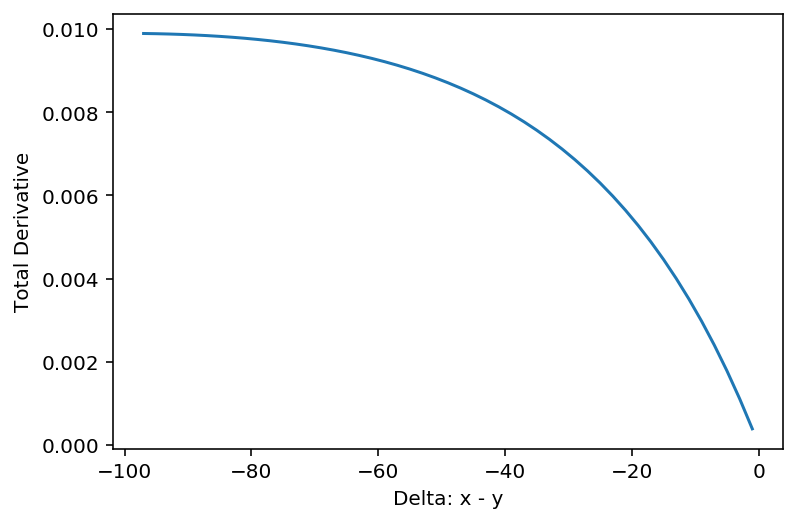

In [179]:
y = np.arange(51, 100, 1)
x = np.arange(50, 1, -1)
delta = x - y
total_derivative = partial_wrt_x(x, y) + partial_wrt_y(x, y)

plt.plot(delta, total_derivative)
plt.xlabel('Delta: x - y')
plt.ylabel('Total Derivative')
plt.show()

#### Both ranges in a single plot

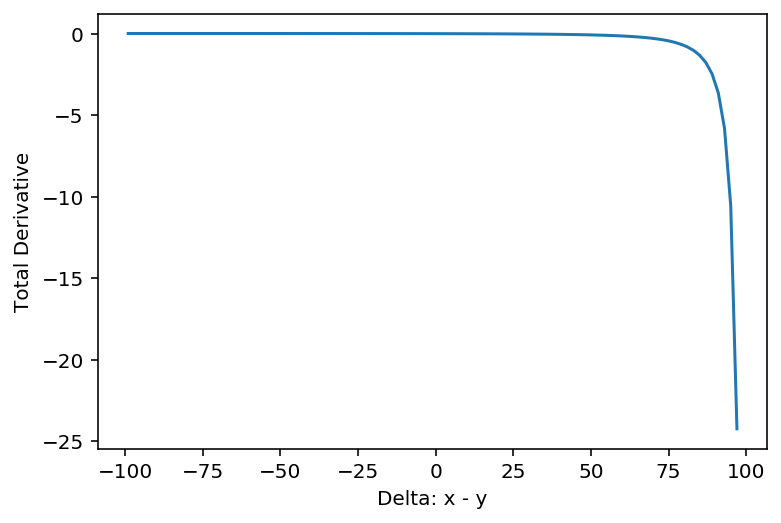

In [180]:
x = np.arange(1, 100, 1)
y = np.arange(100, 1, -1)
delta = x - y
total_derivative = partial_wrt_x(x, y) + partial_wrt_y(x, y)

plt.plot(delta, total_derivative)
plt.xlabel('Delta: x - y')
plt.ylabel('Total Derivative')
plt.show()

#### Zoom in on range from -100 to 0

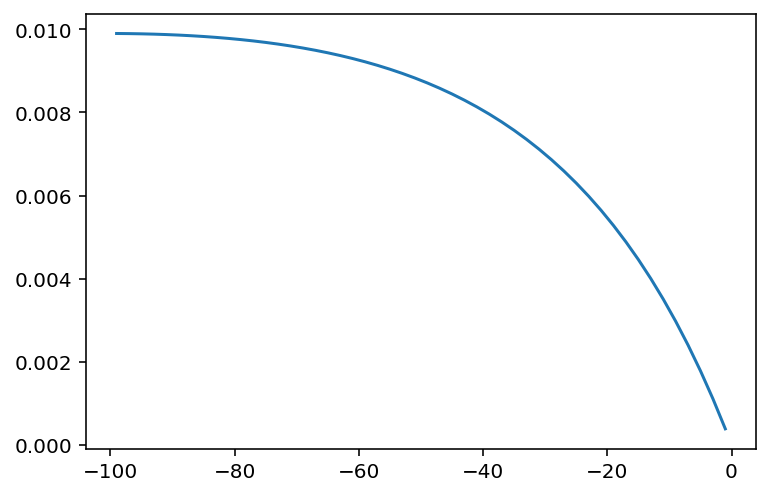

In [181]:
plt.plot(delta[0:50], total_derivative[0:50])
plt.show()

So what we have started to see is that in the domain (input space) where $x < y$, the mutliplier ($x$) is more powerful! Specifically, a slight nudge to both the multiplier and divisor will yield a large resulting output, $f(x,y)$. But notice how weak this effect is compared to the counterpart, when $x > y$! When $x < y$, our total derivative is growing orders of magnitude more slowly than it is shrinking when $x < y$. 

Now, with that said, we can see that the correct way to analyze this function is not via the delta between $x$ and $y$. This is because based on the relative magnitude of $x$ and $y$ their delta may be significant or insignificant. For instance, consider if our $x$ and $y$ ranged as follows:

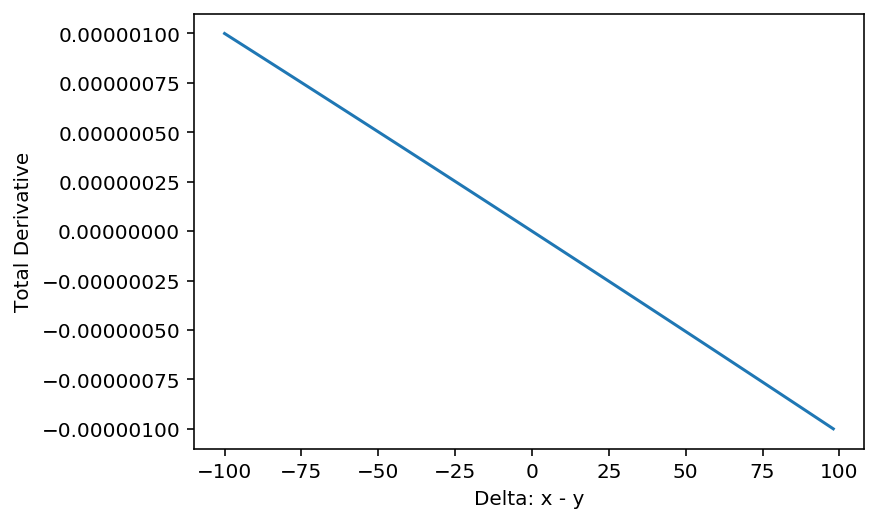

In [182]:
x = np.arange(9_900, 10_000, 1)
y = np.arange(10_000, 9_900, -1)
delta = x - y
total_derivative = partial_wrt_x(x, y) + partial_wrt_y(x, y)

plt.plot(delta, total_derivative)
plt.xlabel('Delta: x - y')
plt.ylabel('Total Derivative')
plt.show()

Above we see that the while the delta is the same as it has always been (ranging from -100 to 100), the total derivative looks _nothing_ like the response we saw previously. Why is that? It is because our derivatives aren't really functions of the delta between $x$ and $y$; rather, they are functions of the ratio of $x$ to $y$. Only via this are they indirectly related to the delta. 

Let us investigate this a bit further. Consider of previous example, only this time let us plot our total derivative against the ratio of x to y in the input space:

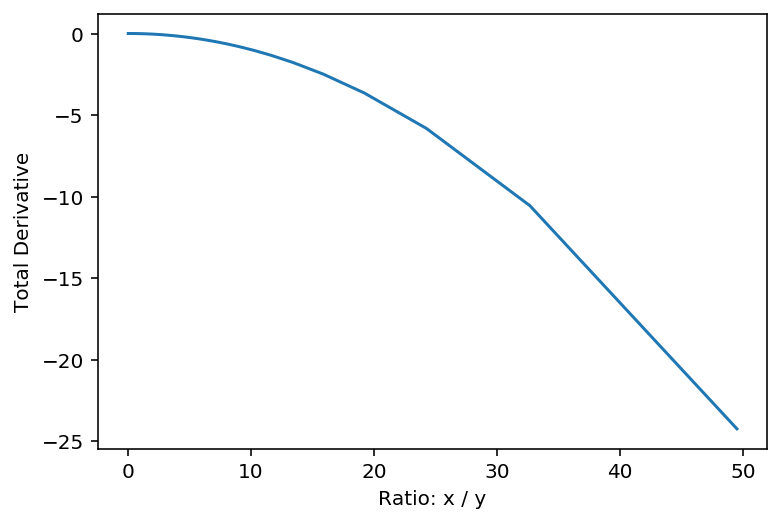

In [191]:
x = np.arange(1, 100, 1)
y = np.arange(100, 1, -1)
ratio = x / y
total_derivative = partial_wrt_x(x, y) + partial_wrt_y(x, y)

plt.plot(ratio, total_derivative)
plt.xlabel('Ratio: x / y')
plt.ylabel('Total Derivative')
plt.show()

In [195]:
mask = total_derivative > 0

In [197]:
ratio[mask]

array([0.01      , 0.02020202, 0.03061224, 0.04123711, 0.05208333,
       0.06315789, 0.07446809, 0.08602151, 0.09782609, 0.10989011,
       0.12222222, 0.13483146, 0.14772727, 0.16091954, 0.1744186 ,
       0.18823529, 0.20238095, 0.21686747, 0.23170732, 0.24691358,
       0.2625    , 0.27848101, 0.29487179, 0.31168831, 0.32894737,
       0.34666667, 0.36486486, 0.38356164, 0.40277778, 0.42253521,
       0.44285714, 0.46376812, 0.48529412, 0.50746269, 0.53030303,
       0.55384615, 0.578125  , 0.6031746 , 0.62903226, 0.6557377 ,
       0.68333333, 0.71186441, 0.74137931, 0.77192982, 0.80357143,
       0.83636364, 0.87037037, 0.90566038, 0.94230769, 0.98039216])

In [198]:
x[mask]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [199]:
y[mask]

array([100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,
        87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,
        74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,
        61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51])

In [200]:
-(10_000) / (9_995)**2

-0.00010010007505003127

In [201]:
1 / 9995

0.00010005002501250626

In [202]:
-(10_000) / (5000)**2

-0.0004

In [203]:
1 / 5000

0.0002

In [204]:
40 / 110

0.36363636363636365

In [205]:
41 /101

0.40594059405940597

In [219]:
w1 = 510
w2 = 800
v1 = 10
v2 = 9

print((w1 + w2 + w1 + w1) / (v1 + v2 + v1 + v1))
print(((w1 / v1) + (w2 / v2) + (w1 / v1) + (w1 / v1)) / 4)

59.743589743589745
60.47222222222222


In [240]:
w1 = 510
w2 = 800
v1 = 1000
v2 = 2000

In [241]:
print(f'den 1: {w1/v1}')
print(f'den 2: {w2/v2}')

den 1: 0.51
den 2: 0.4


In [242]:
def density_method1(w1, w2, v1, v2):
    const = 100
    return (const*w1 + w2) / (const*v1 + v2)

In [243]:
density_method1(w1, w2, v1, v2)

0.5078431372549019

In [244]:
def density_method2(w1, w2, v1, v2):
    const = 100
    return (const* (w1 / v1) + (w2 / v2)) / (const + 1)

In [245]:
density_method2(w1, w2, v1, v2)

0.5089108910891089